In [ ]:
## ecommerceDatasetNLP.csv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# file = open("/home/dai/KP_Module/NLP/Dataset/SMSSpamCollection",'r')
# data = file.readlines()
# data
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/NLP_Dataset/ecommerceDatasetNLP.csv",names=['Label','text'])
data.head()

Label                                               text
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...

In [15]:
data.shape

(50425, 2)

In [22]:
data.isna().sum()

Label    0
text     1
dtype: int64

In [23]:
data.dropna(inplace=True)

In [24]:
X=data['text']
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
y=pd.DataFrame(lbl.fit_transform(data['Label']))

In [25]:
import seaborn as sns
sns.countplot(y=data['Label'])

<Axes: xlabel='count', ylabel='Label'>

In [26]:
data['Label'].value_counts()

Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: Label, dtype: int64

In [27]:
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
import string


In [28]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('indian')

nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package indian to /root/nltk_data...
[nltk_data]   Package indian is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [29]:
#Initiating the stemmer
#It is used to remove affixes (prefix and Postfix)
ls = LancasterStemmer()

def clean_text(sent):
    token1 = word_tokenize(sent) #tokenizing the sentences
    #token2 = [x.lower() for x in token1 if x not in string.punctuation] #Removing the punctuations
    token2 = [x.lower() for x in token1 if x.isalpha() or x.isdigit()] #Removing the punctuations
    token3 = [ls.stem(x) for x in token2 if x not in stopwords.words('english')] #removing affixes
    return token3


In [30]:
#Vectorizing the data using following Vectorizier
from sklearn.feature_extraction.text import TfidfVectorizer

#Initiating the Vectorizer
tfidf = TfidfVectorizer(analyzer=clean_text)
#analyzer will take care of all the preprocessing

#Fiting data to the vectorizer
x_vect = tfidf.fit_transform(data['text'])

#Checking the Dimentionality
x_vect


<50424x40433 sparse matrix of type '<class 'numpy.float64'>'
	with 2485190 stored elements in Compressed Sparse Row format>

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x_vect,y,random_state=0,stratify=y,test_size=0.25)

X_train.shape,X_test.shape


((37818, 40433), (12606, 40433))

In [32]:

#we are using SVMvalued customer	I am pleased to advise you that following rec
from sklearn.svm import SVC

#Initiating the Model
classifier = SVC(kernel='linear')

#fiting the data to the model
classifier.fit(X_train,y_train)

#Testing the model on test data
y_pred = classifier.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy of the model is : 0.9723147707440901
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2955
           1       0.98      0.98      0.98      2168
           2       0.97      0.95      0.96      2655
           3       0.96      0.98      0.97      4828

    accuracy                           0.97     12606
   macro avg       0.97      0.97      0.97     12606
weighted avg       0.97      0.97      0.97     12606



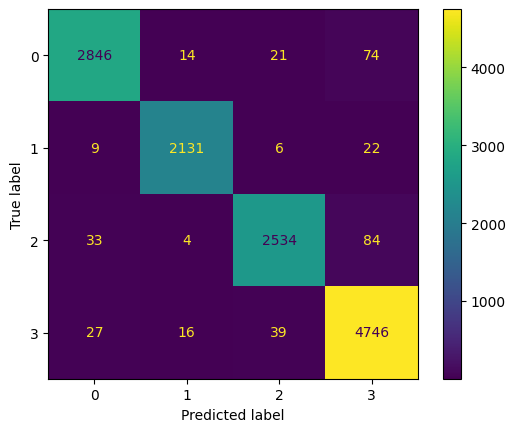

In [33]:

#Caltulating the Accuracy
from sklearn.metrics import accuracy_score

print("accuracy of the model is :",accuracy_score(y_test,y_pred))
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
#cm= confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
#Classification Report
print(classification_report(y_test,y_pred))